In [6]:
from qiskit import *
from numpy import pi

circuit = QuantumCircuit(2, 2)


In [7]:
%matplotlib inline

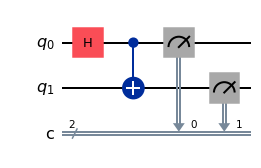

In [8]:
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

circuit.draw(output='mpl')

In [ ]:
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import SparsePauliOp


backend = FakeAlmadenV2()
estimator = Estimator(backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)


observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()

from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(circuit))
 
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
 
#job_result = job.result()
 
# This is the result from our single pub, which had five observables,
# so contains information on all five.
 
#pub_result = job.result()[0]



/home/henning/.local/lib/python3.10/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(
